In [ ]:
#Exploratory analysis goal
#Show show trends in each species' monthly density since the year 2000, compared against
#the long term (1977-present) average for each species

In [1]:
import pandas as pd
import numpy as np
from ggplot import *
import sqlite3

/home/shawn/miniconda3/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/shawn/miniconda3/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/shawn/miniconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect("projects/dc/portal_mammals.sqlite")

In [4]:
#read in data and filter out non rodents
surveys = pd.read_sql_query('SELECT * FROM surveys JOIN species USING (species_id) WHERE taxa = "Rodent"',con)

In [6]:
#Get the average monthly count for each rodent
monthly_species_avg = surveys.groupby(['year','month','species_id']).count().reset_index()
monthly_species_avg['monthly_avg'] = monthly_species_avg.record_id
monthly_species_avg = monthly_species_avg.groupby('species_id').mean()['monthly_avg'].reset_index()
#print(monthly_species_avg)

In [8]:
#Summarze the 2000 to present data as a monthly timeseries for all species

#Grab the data again, but only 2000 till now
surveys = pd.read_sql_query('SELECT * \
                            FROM surveys \
                            JOIN species USING (species_id) \
                            WHERE taxa = "Rodent" AND year>=2000',con)

#Summarize by monthly countsj
monthly_counts = surveys.groupby(['year','month','species_id']).count().reset_index()
monthly_counts['monthly_count'] = monthly_counts.record_id
#Add a dummy day column so that a date can be made
monthly_counts['day'] = 1
monthly_counts['date'] = pd.to_datetime(monthly_counts[['year','month','day']])
#monthly_counts.head()

In [51]:
#Merge in the average monthly count for each species to normalize
monthly_counts = pd.merge(left=monthly_counts, right=monthly_species_avg, how='left',
                          on = 'species_id')

monthly_counts['monthly_count'] = monthly_counts.monthly_count - monthly_counts.monthly_avg
#print(monthly_counts)

In [56]:
#print(surveys)

AH


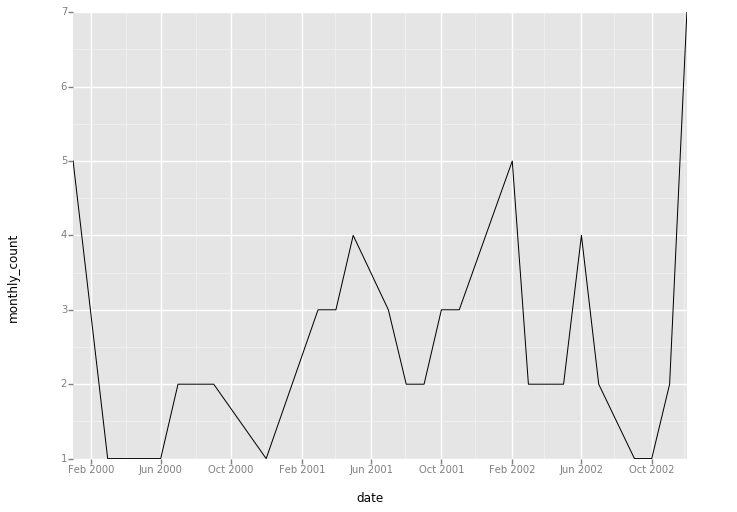

<ggplot: (-9223363272757877795)>
DM


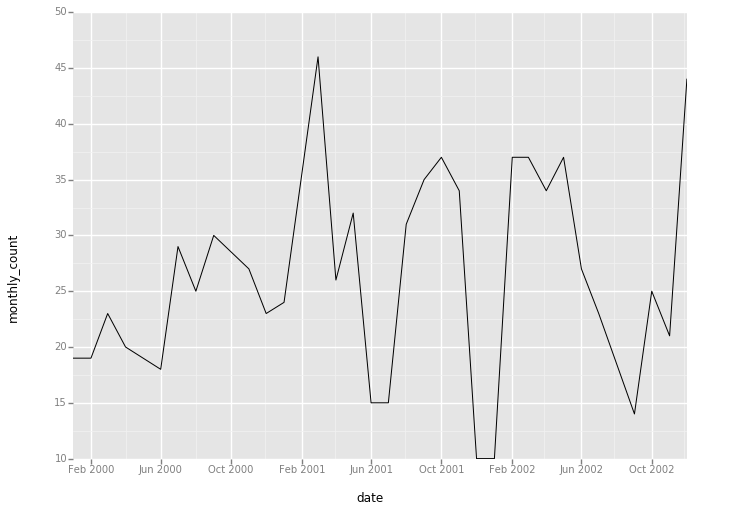

<ggplot: (8764096986916)>
DO


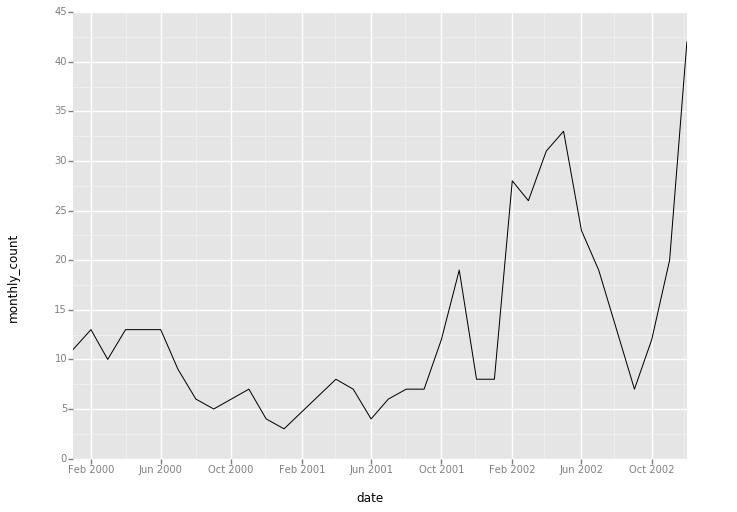

<ggplot: (8764096953278)>
NL


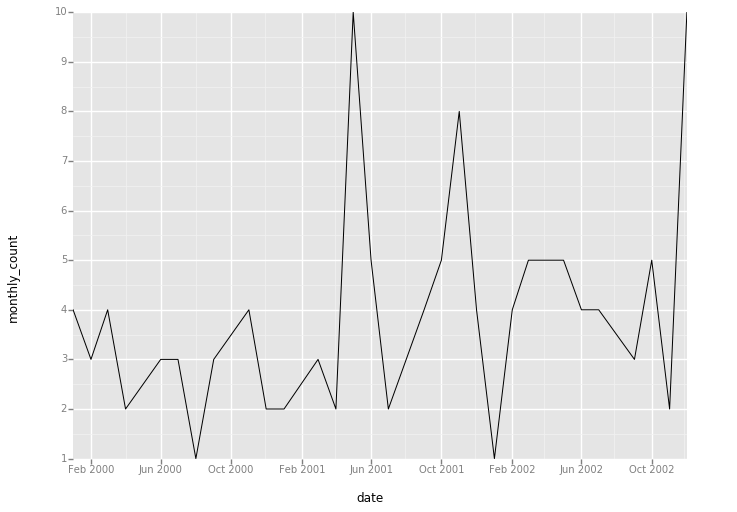

<ggplot: (-9223363272757788707)>
OT


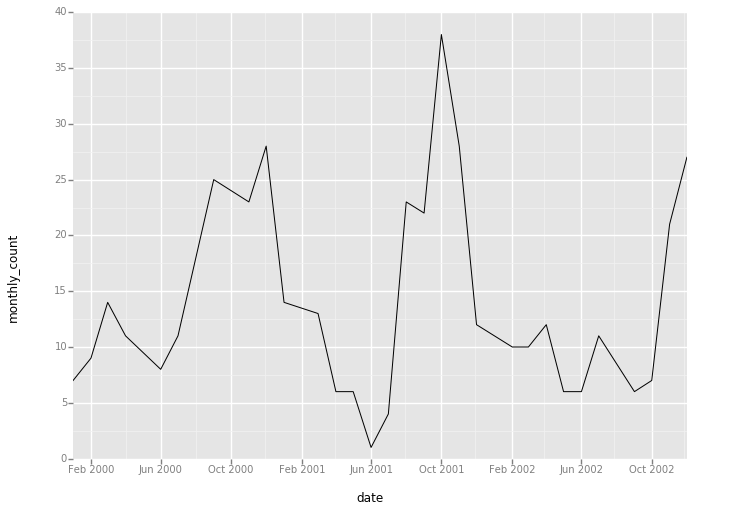

<ggplot: (-9223363272757732941)>
PB


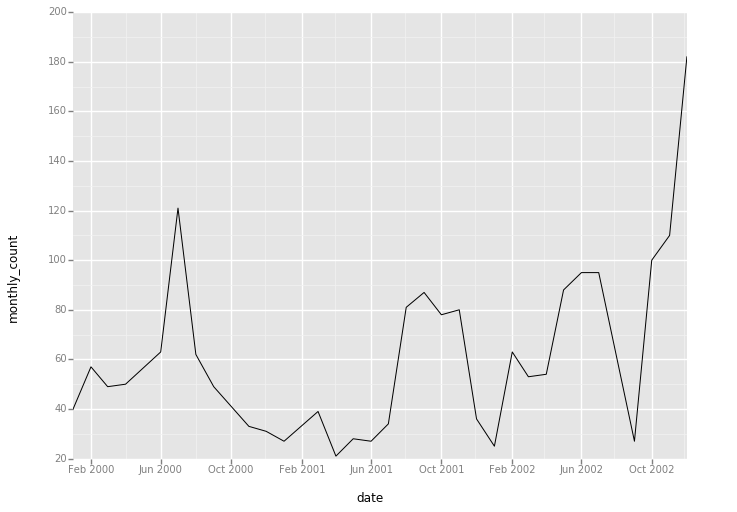

<ggplot: (-9223363272757752355)>
PM


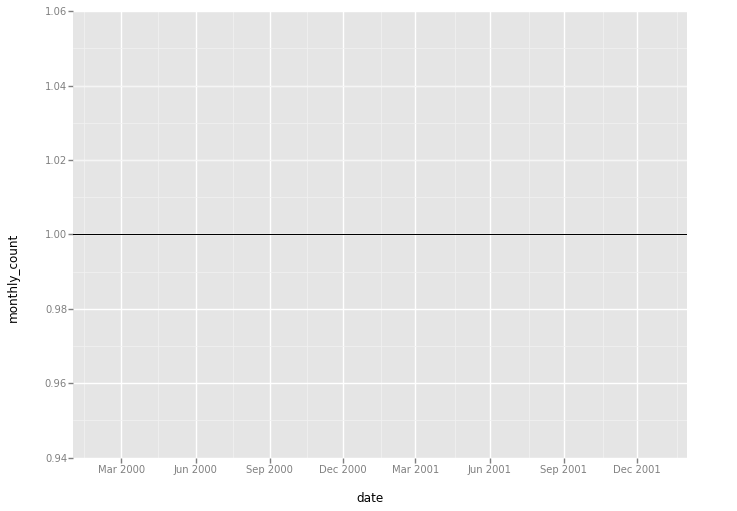

<ggplot: (8764095781738)>
PP


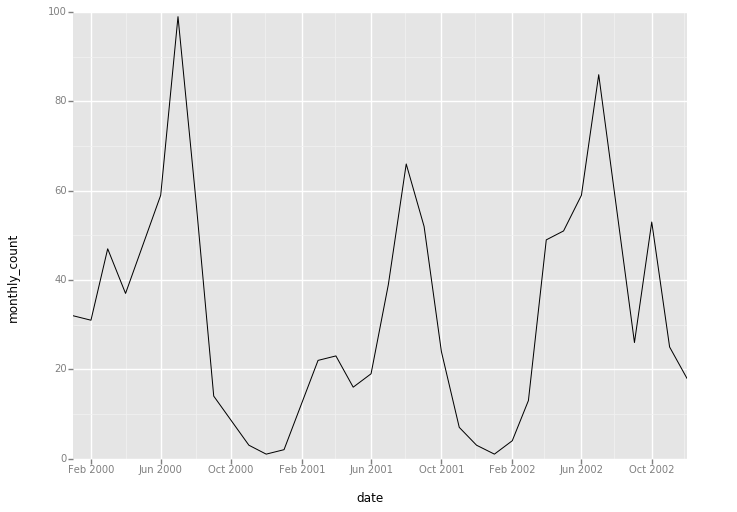

<ggplot: (8764095726484)>
RM


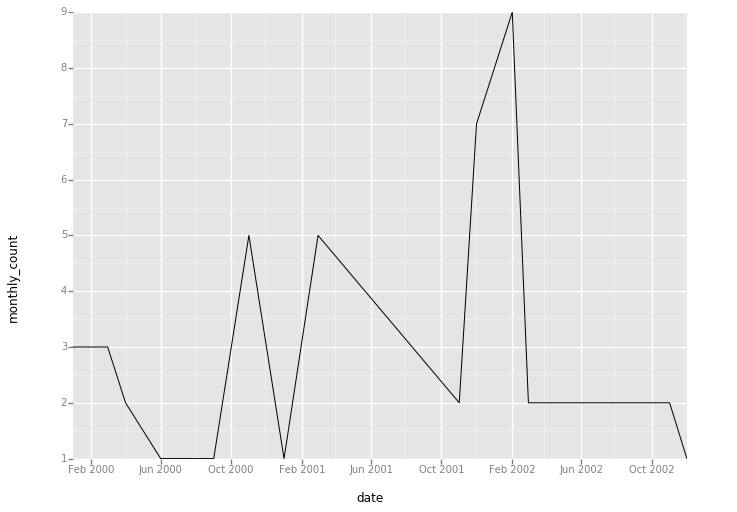

<ggplot: (8764096908436)>
SH


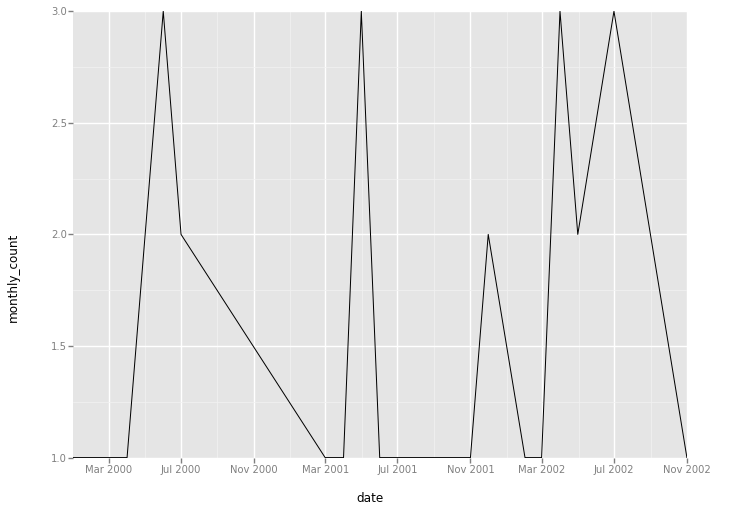

<ggplot: (-9223363272757867376)>
SS


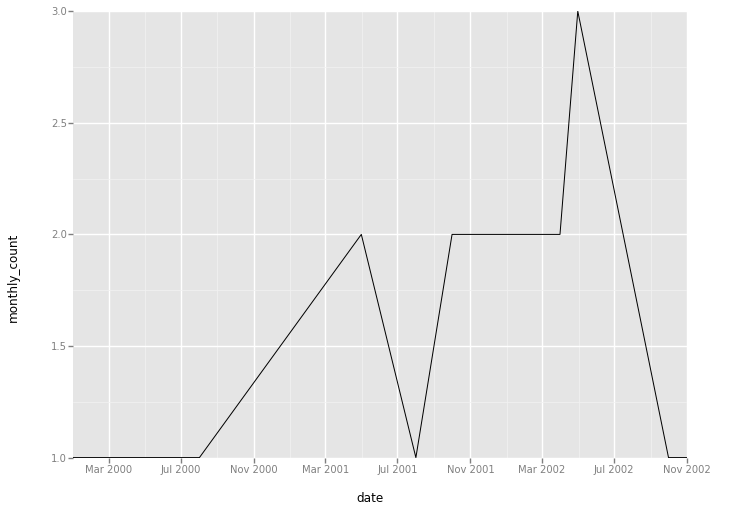

<ggplot: (8764096282537)>
DX


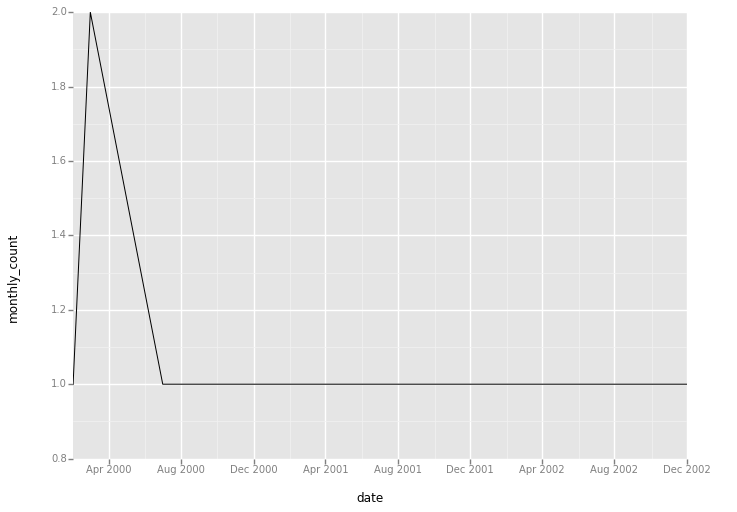

<ggplot: (-9223363272758341737)>
PL


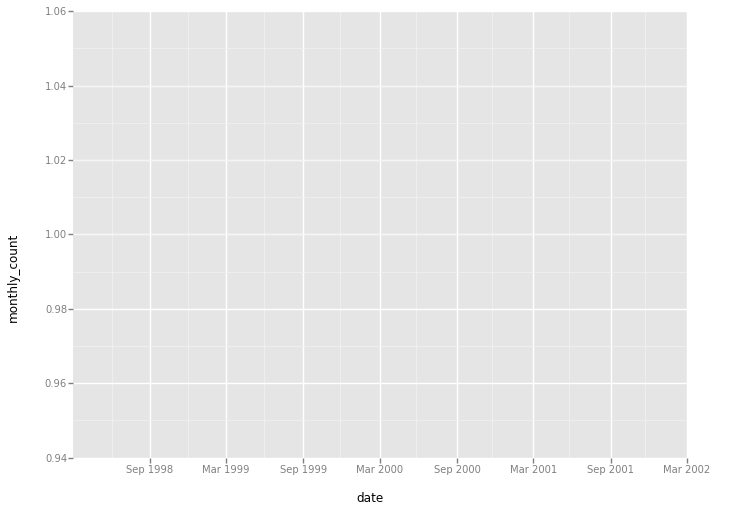

<ggplot: (8764096434117)>
PE


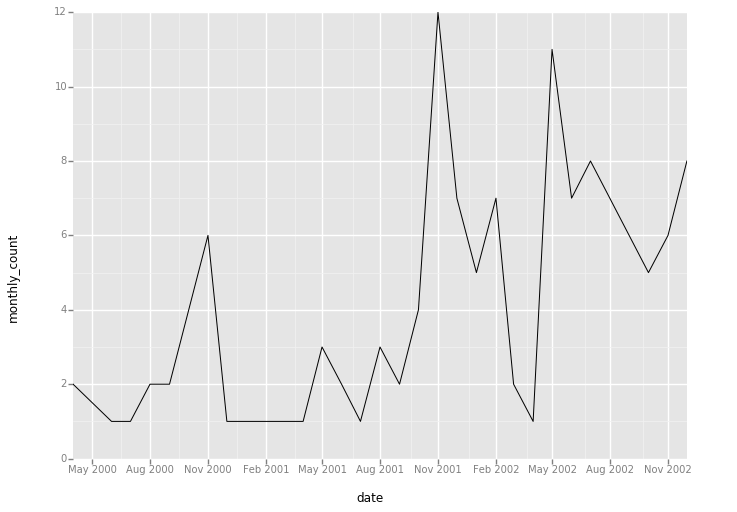

<ggplot: (-9223363272758696490)>
PX


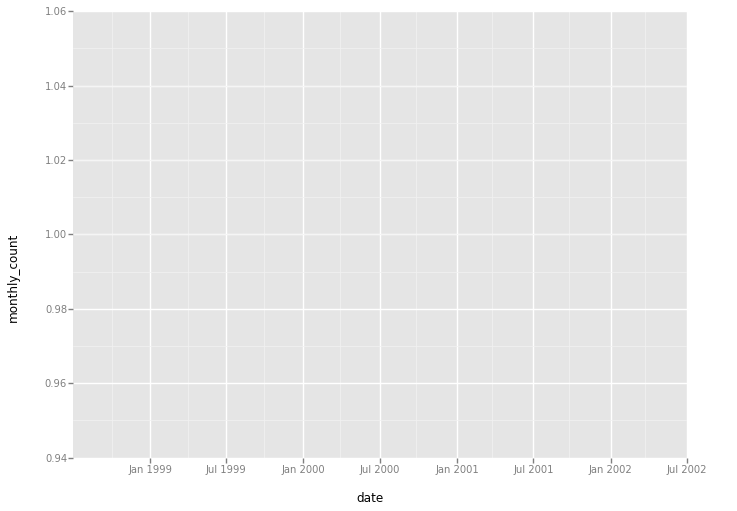

<ggplot: (8764095834937)>
PF


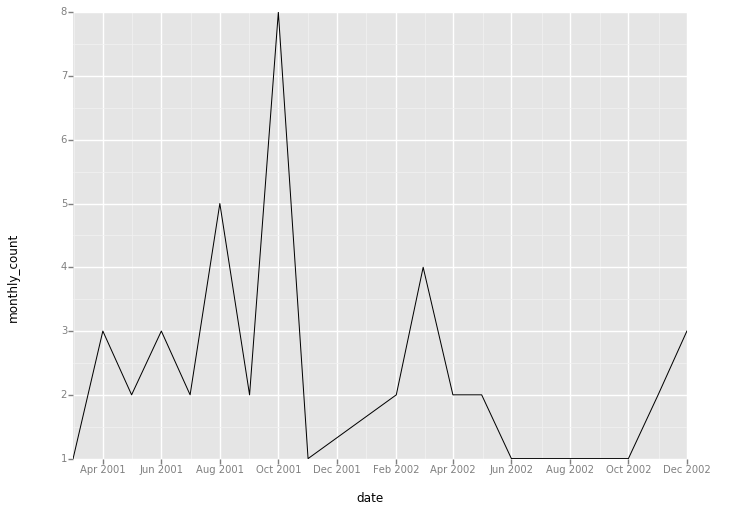

<ggplot: (-9223363272757857911)>
UR


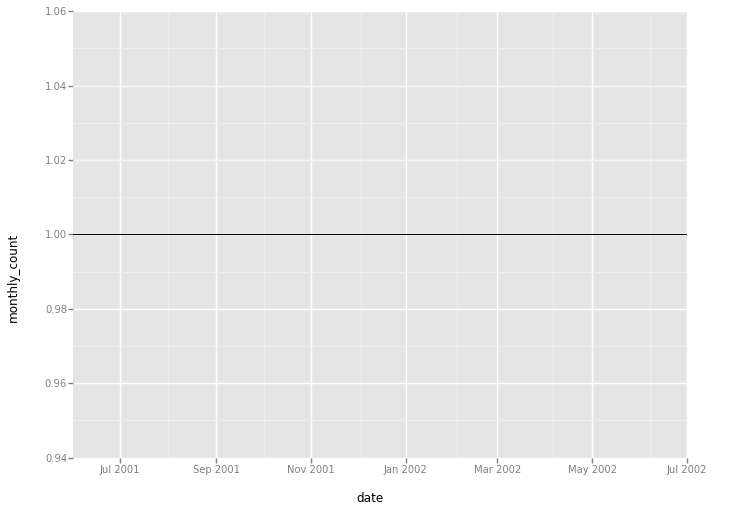

<ggplot: (-9223363272757832679)>
PI


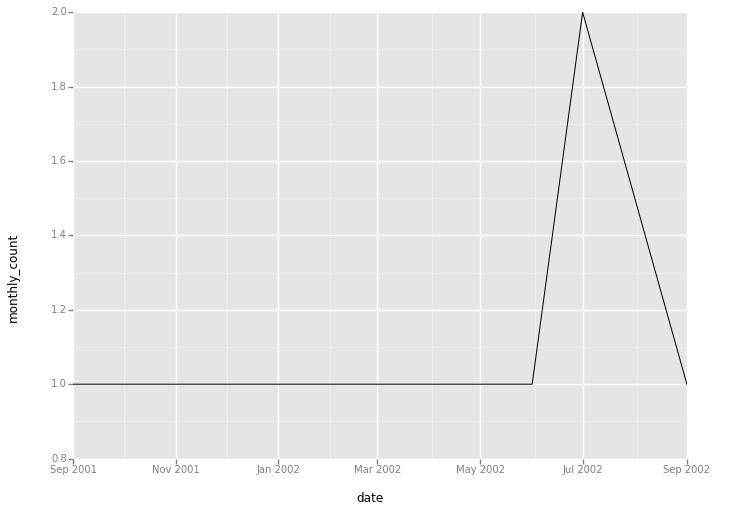

<ggplot: (8764096033733)>
RO


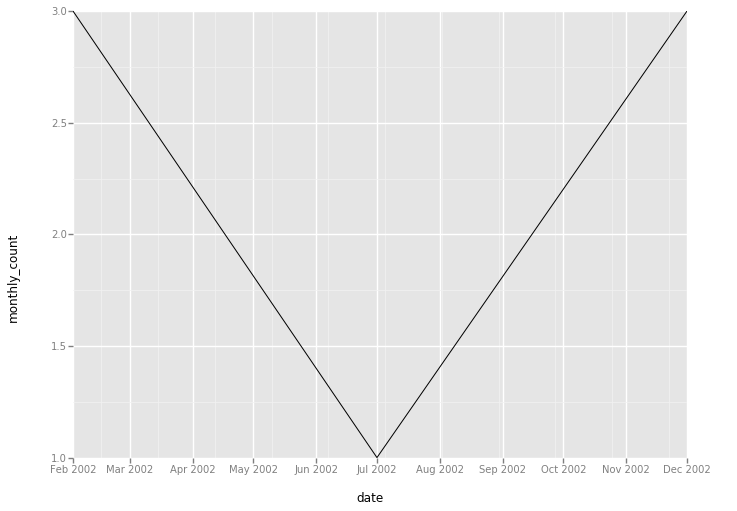

<ggplot: (8764095833878)>
OL


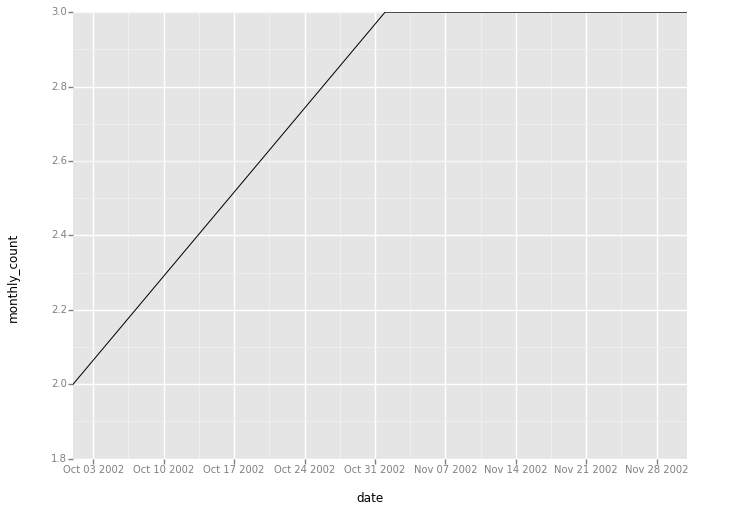

<ggplot: (8764095833878)>
SF


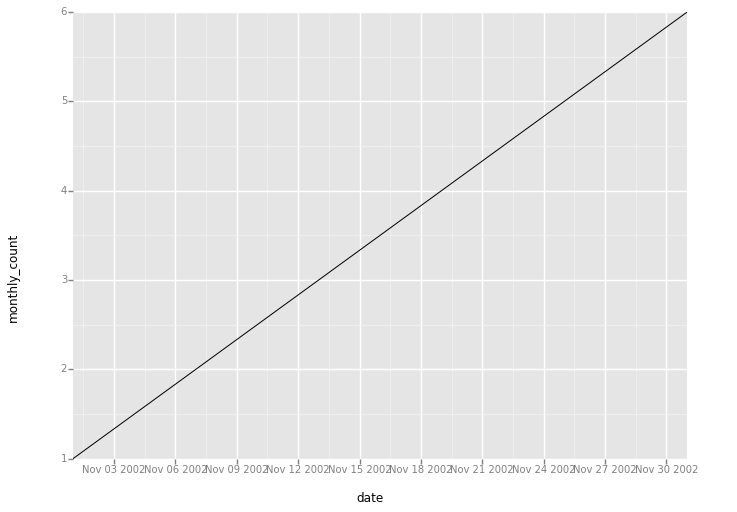

<ggplot: (8764095905435)>


In [9]:
#Make one graph per species
for this_species in monthly_counts.species_id.unique():
    print(this_species)

    species_data = monthly_counts[monthly_counts.species_id == this_species]
    print(ggplot( aes(x='date', y = 'monthly_count'), data=species_data) + geom_line())